# Pipeline de análise de imagens de RX normal, pneumonia ou COVID19 visando emissão de laudos / diagnóstico automatizados a serem confirmados pelo profissional de medicina

### Rede Neural AlexNet (CNN-1)

In [ ]:
# Conectando ao gdrive
import pandas as pd
from google.colab import drive

drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
# Contagem das imagens das classes
import os
import numpy as np
d1 = '/content/drive/MyDrive/PP2/AldenisPipeline/Covid19-Pneumonia-Normal Chest X-Ray Images Dataset.zip (Unzipped Files)/'

covid_dir = d1+'/COVID/'
normal_dir = d1+'/NORMAL/'
pneumo_dir =  d1+'/PNEUMONIA/'

print('Covid images cont:', len(os.listdir(covid_dir)))
print('Normal images cont:', len(os.listdir(normal_dir)))
print('Pneumonia images cont:', len(os.listdir(pneumo_dir)))

Covid images cont: 1626
Normal images cont: 1802
Pneumonia images cont: 1800


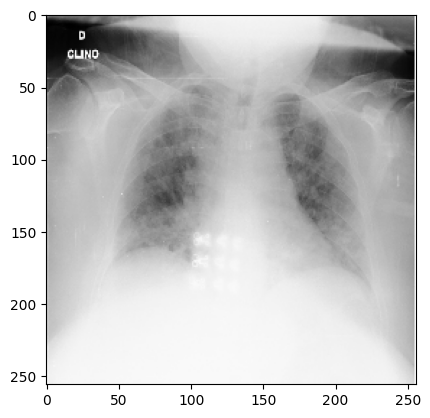

In [ ]:
# Exemplo imagem covid
import cv2
import matplotlib.pyplot as plt
img = cv2.imread(covid_dir+'/COVID.png')
plt.imshow(img)

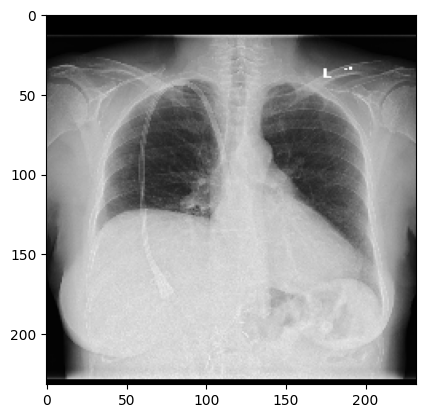

In [ ]:
# Exemplo imagem normal
img = cv2.imread(normal_dir+'/NORMAL.png')
plt.imshow(img)

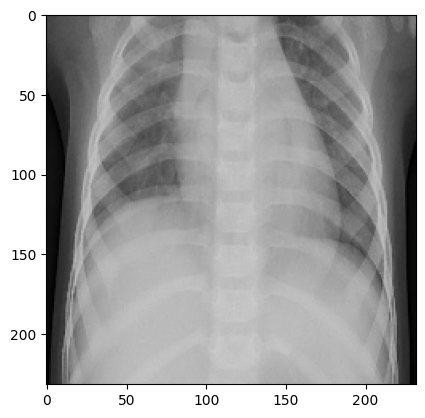

In [ ]:
# Exemplo imagem pneumonia
img = cv2.imread(pneumo_dir+'/PNEUMONIA.png')
plt.imshow(img)

In [ ]:
img.shape

(232, 232, 3)

In [ ]:
urls = os.listdir(covid_dir)
path = covid_dir + urls[0]
path

'/content/drive/MyDrive/PP2/AldenisPipeline/Covid19-Pneumonia-Normal Chest X-Ray Images Dataset.zip (Unzipped Files)//COVID/COVID_166.png'

In [ ]:
# Carregando as imagens
def loadImages(path, urls, target):
  images = []
  labels = []
  for i in range(len(urls)):
    img_path = path + "/" + urls[i]
    img = cv2.imread(img_path)
    img = img / 255.0
    #print(img_path)
    # if we want to resize the images
    img = cv2.resize(img, (100, 100))
    images.append(img)
    labels.append(target)
  images = np.asarray(images)
  return images, labels

In [ ]:
covid_path = covid_dir
covidUrl = os.listdir(covid_path)
covidImages, covidTargets = loadImages(covid_path, covidUrl, 1)

In [ ]:
len(covidUrl), len(covidImages), len(covidTargets)

(1626, 1626, 1626)

In [ ]:
normal_path = normal_dir
normalUrl = os.listdir(normal_path)
normalImages,normalTargets = loadImages(normal_path, normalUrl, 0)

In [ ]:
len(normalUrl), len(normalImages), len(normalTargets)

(1802, 1802, 1802)

In [ ]:
pneumo_path = pneumo_dir
pneumoUrl = os.listdir(pneumo_path)
pneumoImages,pneumoTargets = loadImages(pneumo_path, pneumoUrl, 2)

In [ ]:
len(pneumoUrl), len(pneumoImages), len(pneumoTargets)

(1800, 1800, 1800)

In [ ]:
pneumoUrl[0]

'PNEUMONIA_1714.png'

In [ ]:
pneumoImages[0]

array([[[0.78604392, 0.78604392, 0.78604392],
        [0.75422431, 0.75422431, 0.75422431],
        [0.72953725, 0.72953725, 0.72953725],
        ...,
        [0.81710588, 0.81710588, 0.81710588],
        [0.80909176, 0.80909176, 0.80909176],
        [0.79899608, 0.79899608, 0.79899608]],

       [[0.80859765, 0.80859765, 0.80859765],
        [0.73784   , 0.73784   , 0.73784   ],
        [0.69312157, 0.69312157, 0.69312157],
        ...,
        [0.74155294, 0.74155294, 0.74155294],
        [0.75188078, 0.75188078, 0.75188078],
        [0.81031216, 0.81031216, 0.81031216]],

       [[0.81550588, 0.81550588, 0.81550588],
        [0.72223529, 0.72223529, 0.72223529],
        [0.66368627, 0.66368627, 0.66368627],
        ...,
        [0.74635294, 0.74635294, 0.74635294],
        [0.74682353, 0.74682353, 0.74682353],
        [0.81138039, 0.81138039, 0.81138039]],

       ...,

       [[0.14918431, 0.14918431, 0.14918431],
        [0.08655686, 0.08655686, 0.08655686],
        [0.06945098, 0

In [ ]:
pneumoTargets[0]

2

In [ ]:
covidImages.shape

(1626, 100, 100, 3)

In [ ]:
normalImages.shape

(1802, 100, 100, 3)

In [ ]:
pneumoImages.shape

(1800, 100, 100, 3)

In [ ]:
data = np.r_[covidImages, normalImages, pneumoImages]
data.shape

(5228, 100, 100, 3)

In [ ]:
targets = np.r_[covidTargets, normalTargets, pneumoTargets]
targets.shape

(5228,)

In [ ]:
from sklearn.model_selection import train_test_split
(x_train, x_test, y_train, y_test) = train_test_split(data, targets, test_size=0.20, stratify=targets, random_state=42)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
model = Sequential([
    Conv2D(32, 3, input_shape=(100,100,3), activation='relu'),
    MaxPooling2D(),
    Conv2D(16, 3, activation='relu'),
    MaxPooling2D(),
    Conv2D(16, 3, activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(3, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 16)        4624      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 23, 16)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 21, 21, 16)        2320      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 10, 10, 16)       0

In [ ]:
# Converte os rótulos para uma forma de categoria
num_classes = 3
y_train_onehot = tf.keras.utils.to_categorical(y_train, num_classes)
y_test_onehot = tf.keras.utils.to_categorical(y_test, num_classes)
y_train[0]

1

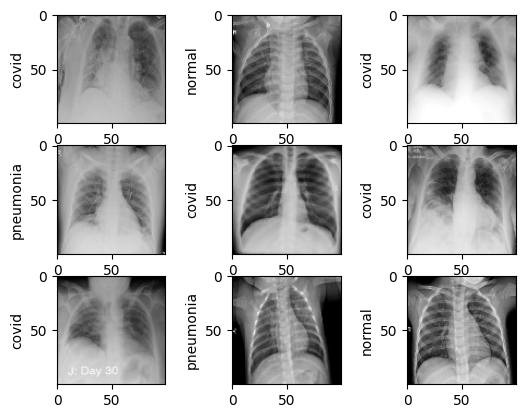

In [ ]:
# Cria lista de rótulos para as imagens
category_dict = {0:'normal', 1:'covid',2:'pneumonia'}

# Visualizando algumas imagens do dataset
plt.figure()
for i in range(9):
  # cria um grafico de 3 x 3
  plt.subplot(3,3,i+1)
  # mostra a imagem
  plt.imshow(x_train[i])
  # mostra o rotulo
  plt.ylabel(category_dict[y_train[i]])
plt.show()

In [ ]:
# Definindo os hiperparametros
batch_size   = 32
input_shape  = (150, 150, 3)
random_state = 42
alpha        = 1e-5
epoch        = 5

In [ ]:
# Carregando os avaliadores do cifar10
from tensorflow.keras.callbacks import ModelCheckpoint
model_name = "final_covid.h5"
checkpoint = ModelCheckpoint(model_name, monitor='loss', verbose=1, save_best_only=True, mode='max')

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

# Nos auxiliara a reduzir a taxa de aprendizado pelo fator (factor) caso não ocorra a mudança no loss.
lr_reduce = ReduceLROnPlateau(monitor='loss', factor=0.1, min_delta=1e-5, patience=5, verbose=1)

# Array dos callbacks
callbacks = [checkpoint, lr_reduce]

In [ ]:
# Treinando o modelo
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
model.fit(x_train, y_train, batch_size = batch_size, epochs = epoch, validation_data=(x_test, y_test), callbacks=callbacks)

Epoch 1/5
131/131 [==============================] - ETA: 0s - loss: 0.7034 - accuracy: 0.7291
Epoch 1: loss improved from -inf to 0.70340, saving model to final_covid.h5
131/131 [==============================] - 61s 452ms/step - loss: 0.7034 - accuracy: 0.7291 - val_loss: 0.3313 - val_accuracy: 0.8862 - lr: 1.0000e-04
Epoch 2/5
131/131 [==============================] - ETA: 0s - loss: 0.3245 - accuracy: 0.8795
Epoch 2: loss did not improve from 0.70340
131/131 [==============================] - 62s 475ms/step - loss: 0.3245 - accuracy: 0.8795 - val_loss: 0.2787 - val_accuracy: 0.8977 - lr: 1.0000e-04
Epoch 3/5
131/131 [==============================] - ETA: 0s - loss: 0.2571 - accuracy: 0.9055
Epoch 3: loss did not improve from 0.70340
131/131 [==============================] - 61s 467ms/step - loss: 0.2571 - accuracy: 0.9055 - val_loss: 0.2250 - val_accuracy: 0.9111 - lr: 1.0000e-04
Epoch 4/5
131/131 [==============================] - ETA: 0s - loss: 0.2317 - accuracy: 0.9175
Epoch

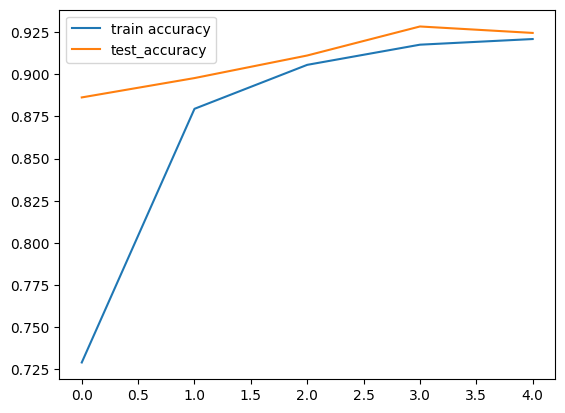

In [ ]:
plt.plot(model.history.history['accuracy'], label = 'train accuracy')
plt.plot(model.history.history['val_accuracy'],label = 'test_accuracy')
plt.legend()
plt.show()

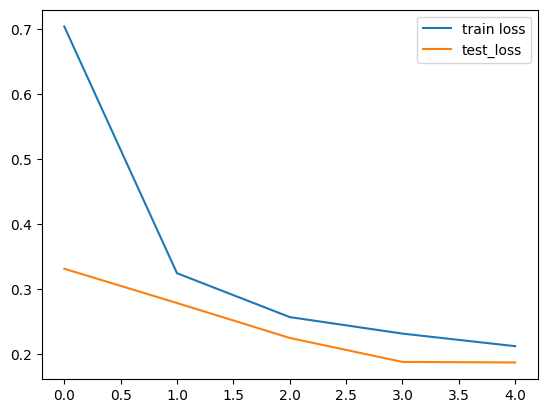

In [ ]:
plt.plot(model.history.history['loss'], label = 'train loss')
plt.plot(model.history.history['val_loss'],label = 'test_loss')
plt.legend()
plt.show()

33/33 [==============================] - 10s 284ms/step
Métricas médias
              precision    recall  f1-score   support

           0       0.94      0.88      0.91       361
           1       0.95      0.96      0.96       325
           2       0.89      0.94      0.91       360

    accuracy                           0.92      1046
   macro avg       0.93      0.93      0.93      1046
weighted avg       0.93      0.92      0.92      1046

Acurácia: 0.9245
Precisão: 0.9257
Cobertura(recall): 0.9245
F1(weighted): 0.9244
PRF support: (array([0.94047619, 0.95412844, 0.88511749]), array([0.87534626, 0.96      , 0.94166667]), array([0.90674319, 0.95705521, 0.91251682]), array([361, 325, 360]))
Cohen Kappa: 0.8866
Acurácia: 0.9245
Sensitividade: 0.9723
Especificidade: 0.9842


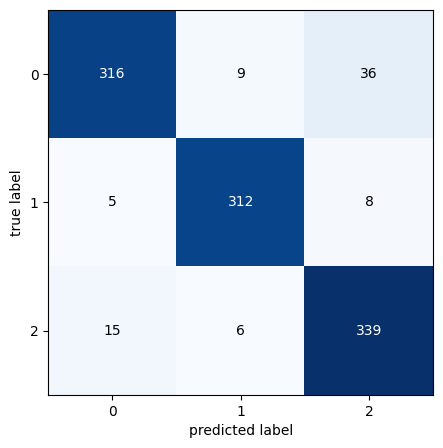

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, cohen_kappa_score, precision_score, recall_score, f1_score, precision_recall_curve, precision_recall_fscore_support
# Gerando Matriz de confusão

from sklearn.metrics import confusion_matrix
pred = model.predict(x_test)
pred = np.argmax(pred,axis = 1)
y_true = y_test
cm = confusion_matrix(y_true, pred)

total = sum(sum(cm))

print('Métricas médias')
print(classification_report(y_true, pred))
print("Acurácia: {:.4f}".format(accuracy_score(y_true, pred)))
print("Precisão: {:.4f}".format(precision_score(y_true, pred, average='weighted')))
print("Cobertura(recall): {:.4f}".format(recall_score(y_true, pred, average='weighted')))
print("F1(weighted): {:.4f}".format(f1_score(y_true, pred, average='weighted')))
print("PRF support:",precision_recall_fscore_support(y_true, pred))

print("Cohen Kappa: {:.4f}".format(cohen_kappa_score(y_true, pred)))

acc = (cm[0, 0] + cm[1, 1] + cm[2, 2]) / total
sensitivity = cm[0, 0] / (cm[0, 0] + cm[0, 1])#?
specificity = cm[1, 1] / (cm[1, 0] + cm[1, 1])#?

print("Acurácia: {:.4f}".format(acc))
print("Sensitividade: {:.4f}".format(sensitivity))
print("Especificidade: {:.4f}".format(specificity))

from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=cm ,  figsize=(5, 5))
plt.show()

In [ ]:
model.save('models/covid_detection_model.h5')

In [ ]:
loaded_model = tf.keras.saving.load_model("models/covid_detection_model.h5")

In [ ]:
from PIL import Image
import numpy as np

test_image = Image.open(covid_dir+'COVID.png')
#test_image = Image.open(normal_dir+'NORMAL.png')
#test_image = Image.open(pneumo_dir+'PNEUMONIA.png')

test_image = test_image.resize((100, 100))

if test_image.mode != "RGB":
    test_image = test_image.convert("RGB")

test_image = np.array(test_image)
test_image = np.expand_dims(test_image, axis=0)

result = model.predict(test_image)

1/1 [==============================] - 0s 45ms/step


In [ ]:
result[0]

array([0., 1., 0.], dtype=float32)

In [ ]:
if result[0][0] == 1:
    prediction = 'Normal'
    print(prediction)
elif result[0][1] == 1:
    prediction = 'COVID'
    print(prediction)
elif result[0][2] == 1:
    prediction = 'PNEUMONIA'
    print(prediction)

COVID


1/1 [==============================] - 0s 60ms/step


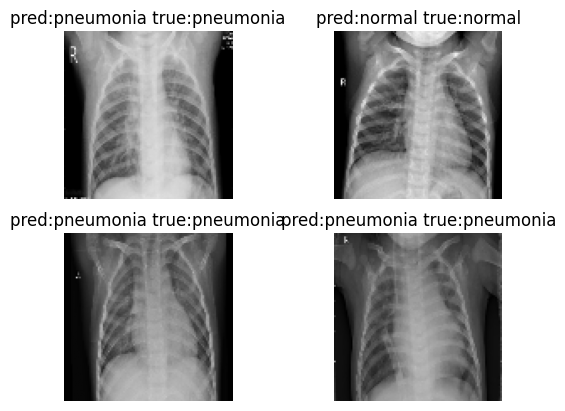

In [ ]:
# lista de rotulos preditos
pred_list = []

plt.figure()

for i in range(0,4):
  plt.subplot(2,2, i+1)
  #plota
  plt.imshow(x_test[i])
  #prediz
  #pred = new_model.predict(x_test[0:10])
  #outra forma de predicao se a acima nao funcionar
  pred = np.argmax(loaded_model.predict(x_test[0:10]), axis=-1)
  pred_list.append(pred)
  #mostra os rotulos da imagens e as predições
  x = category_dict[pred[i]]
  y = category_dict[y_test[i]]
  plt.title("pred:" + x + " true:" + y)
  plt.axis('off')
plt.show()